In [58]:
import graphviz
import string
from scipy import stats
import random

In [2]:
%config InlineBackend.figure_formats = ['svg']

In [62]:
class Node():
    def __init__(self, name, rv=None):
        self.name = name
        self.rv = rv if rv is not None else stats.bernoulli(0.5)
        
class Edge():
    def __init__(self, parent, child):
        self.parent = parent
        self.child = child

class BayesianNetwork():
    
    def __init__(self, nodes, edges):
        self.nodes = nodes
        self.edges = []
        for edge in edges:
            parent = self.nodes[edge[0]]
            child = self.nodes[edge[1]]
            self.edges.append(Edge(parent, child))
            
    def add_edge(self, parent_name, child_name):
        self.add_node(parent_name)
        parent = self.nodes[parent_name]
        self.add_node(child_name)
        child = self.nodes[child_name]
        self.edges.append(Edge(parent, child))
        
    def add_node(self, node_name):
        if node_name not in self.nodes:
            self.nodes.update({node_name:Node(node_name)})
            
    def display(self, cond_probabilities=False):
        dot = graphviz.Digraph()
        for node in self.nodes.values():
            dot.node(node.name)
        for edge in self.edges:
            dot.edge(edge.parent.name, edge.child.name)
        return dot

In [63]:
N = 5
node_names = string.ascii_uppercase[:N]
unif = stats.uniform.rvs(size=N)

nodes = {name:Node(name, stats.bernoulli(p)) for name, p in zip(node_names, unif)}
edges = [['A', 'B'], ['A', 'C'], ['C', 'D'], ['B', 'D'], ['D', 'E']]

net = BayesianNetwork(nodes, edges)

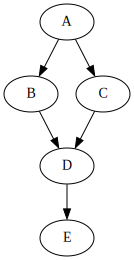

In [64]:
net.display()

# TO-DO

1. Make the rv's depend on one another!!!!
2. ??
3. Profit